In [1]:
import tensorflow as tf


In [2]:
#mnsit dataset is preloaded in the tf keras api
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

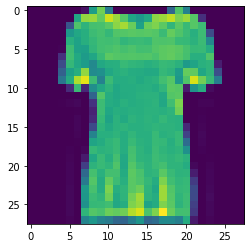

In [13]:
#To visulaize the dataset use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[10])
print(train_images[10])


[[  0   0   0   0   0   0   0   0   0   0   0 145 190  97 109 105 187  76
    0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  64 170 163 208 243 240 229 173 162
  154  18   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  39 158 196 149 191 199 223 243 186 191 170
  155 162 126  22   0   0   0   0   0   0]
 [  0   0   0   0   3   0 105 161 150 141 130 199 239 229 220 188 244 145
  128 142 151 175  23   0   2   0   0   0]
 [  0   0   0   0   0   0 150 137 134 130 147 121 241 255 114 240 173 142
  136 132 128 153 113   0   0   0   0   0]
 [  0   0   0   0   0  17 157 129 146 149 137 141 177 200 200 207 134 145
  142 140 132 129 140   3   0   0   0   0]
 [  0   0   0   0   0  50 158 137 153 150 125 155 191 175 141 165 166 153
  130 129 132 141 149  18   0   0   0   0]
 [  0   0   0   0   0  77 166 161 137 151 166 181 216 182 158 215 195 155
  159 162 173 150 150  58   0   0   0   0]
 [  0   0   0   0   0 104 159 170 140 132 182 198 208 175 136 17

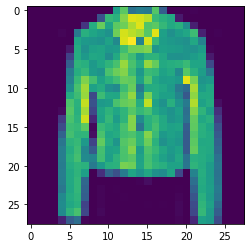

In [14]:
plt.imshow(test_images[10])
print(test_images[10])


In [15]:
#Every element is a 28*28 dim image with values ranging between 0-255
# We will normalize these values first, simply by dividing every value by 255

train_images = train_images/255
test_images = test_images/255


In [16]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

W0810 21:38:27.530298 139693481244480 deprecation.py:506] From /home/dynamo/sam_d007/envs/jvenv/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [18]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs =10)

Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2796 - acc: 0.8959
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2643 - acc: 0.9018
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2568 - acc: 0.9040
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2455 - acc: 0.9075
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2357 - acc: 0.9122
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2301 - acc: 0.9139
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2223 - acc: 0.9152
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2126 - acc: 0.9204
Epoch 9/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2094 - acc: 0.9215
Epoch 10/10
60000/60000 [==============================] - 4s 62us/sample - loss: 

In [23]:
#Evaluating the model in test data
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3558 - acc: 0.8829


[0.3557679729104042, 0.8829]